# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*


## Библиотека pandas. Упражнения.
## Байдаков Илья

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/pileyan/Data/master/data/pima-indians-diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

__Задание 1.__

Как вы видите, в данных много пропусков (NaN). Посчитайте количество пропусков в каждом из столбцов.

In [3]:
#1
missing = data.isna().sum().reset_index()
#2
missing2 = data.isnull().sum().reset_index()

missing

,index,0
0,Pregnancies,0
1,Glucose,5
2,BloodPressure,35
3,SkinThickness,227
4,Insulin,374
5,BMI,11
6,DiabetesPedigreeFunction,0
7,Age,0
8,Class,0


__Задание 2.__

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [4]:
#1

discrete_index = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age']
continuous_index = ['BMI','DiabetesPedigreeFunction']

data_imp = data.copy()

for col in data_imp.columns:
    missing = data_imp[col].isnull()
    num_missing = missing.sum()
    if num_missing > 0:
        if col in discrete_index :
            med = data_imp[col].median()
            data_imp[col] = data_imp[col].fillna(med)
        elif col in continuous_index :
            mean = round(data_imp[col].mean(axis = 0),1)
            data_imp[col] = data_imp[col].fillna(mean)

data_imp

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [5]:
#2
from sklearn.impute import SimpleImputer

data_imp2 = data.copy()

imp_median = SimpleImputer(strategy='median').fit(data_imp2[discrete_index])
data_imp2[discrete_index] = imp_median.transform(data_imp2[discrete_index])

imp_mean = SimpleImputer(strategy='mean').fit(data_imp2[continuous_index])
data_imp2[continuous_index] = imp_mean.transform(data_imp2[continuous_index])

data_imp2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47.0,1


__Задание 3.__

Вычислите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [6]:
#1
data_stat = pd.DataFrame()
data_stat['min']=data_imp.min()
data_stat['max'] = data_imp.max()
data_stat['mean'] = round(data_imp.mean(),2)
data_stat['disp'] = round(data_imp.var(),2)
data_stat['q25'] = round(data_imp.quantile(q=0.25),2)
data_stat['q50'] = round(data_imp.quantile(q=0.50),2)
data_stat['q75'] = round(data_imp.quantile(q=0.75),2)

data_stat

,min,max,mean,disp,q25,q50,q75
Pregnancies,0.000,17.00,3.85,11.35,1.00,3.00,6.00
Glucose,44.000,199.00,121.66,926.49,99.75,117.00,140.25
BloodPressure,24.000,122.00,72.39,146.33,64.00,72.00,80.00
SkinThickness,7.000,99.00,29.11,77.29,25.00,29.00,32.00
Insulin,14.000,846.00,140.67,7462.03,121.50,125.00,127.25
BMI,18.200,67.10,32.46,47.27,27.50,32.40,36.60
DiabetesPedigreeFunction,0.078,2.42,0.47,0.11,0.24,0.37,0.63
Age,21.000,81.00,33.24,138.30,24.00,29.00,41.00
Class,0.000,1.00,0.35,0.23,0.00,0.00,1.00


In [7]:
#2
data_stat_2 = pd.DataFrame()
data_stat_2 = data_imp.describe()
data_stat_2.loc['disp',:] = data_stat_2.loc['std'].apply(lambda x: x**2)
round(data_stat_2.loc[['min','max','mean','disp','25%','50%','75%']],3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
min,0.000,44.000,24.000,7.000,14.000,18.200,0.078,21.000,0.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000
mean,3.845,121.656,72.387,29.108,140.672,32.458,0.472,33.241,0.349
disp,11.354,926.489,146.329,77.286,7462.033,47.268,0.110,138.303,0.227
25%,1.000,99.750,64.000,25.000,121.500,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.000,29.000,125.000,32.400,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000


__Задание 4.__

У скольких женщин старше 50 лет обнаружен диабет?

In [8]:
count = data[ (data['Age']>50) & (data['Class']==1) ].shape[0]
print(f'У {count} женщин старше 50 лет обнаружен диабет')

У 38 женщин старше 50 лет обнаружен диабет


__Задание 5.__

Найдите трех женщин с наибольшим числом беременностей.

In [9]:
data.sort_values(by=['Pregnancies'],ascending = False).head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
159,17,163.0,72.0,41.0,114.0,40.9,0.817,47,1
88,15,136.0,70.0,32.0,110.0,37.1,0.153,43,1
298,14,100.0,78.0,25.0,184.0,36.6,0.412,46,1


__Задание 6.__

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [10]:
count = data[ (data['Age']>30) & (data['Age']<40) & (data['Pregnancies']>=3) ].shape[0]
print(f'Успело {count} женщин')

Успело 115 женщин


__Задание 7.__

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [11]:
count_norm = data[ (data['BloodPressure']>=80) & (data['BloodPressure']<=89) ]['BloodPressure'].count()
count_notna_pressures = data.describe().loc['count','BloodPressure']
perc_norm = round(count_norm/count_notna_pressures*100,1)
print(f'У {perc_norm}% процентов женщин давление нормальное (среди тех, чьё давление известно)')

У 19.8% процентов женщин давление нормальное (среди тех, чьё давление известно)


__Задание 8.__

Считается, что BMI >= 30 - это признак ожирения. 
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [12]:
meanPressure = data_stat.loc['BloodPressure','mean']
count = data[ (data.BMI >= 30) & (data.BloodPressure > meanPressure) ].shape[0]
print(f'У {count} женщин с признаком ожирения кровяное давление выше среднего')

У 248 женщин с признаком ожирения кровяное давление выше среднего


__Задание 9.__

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет. 

In [13]:
isdiabet = data[data.Class == 1].Glucose.describe()['mean']
notdiabet = data[data.Class == 0].Glucose.describe()['mean']
print(f'Glucose \n\
Среди диабетиков: {round(isdiabet,1)}\n\
Среди недиабетиков: {round(notdiabet,1)}')

Glucose 
Среди диабетиков: 142.3
Среди недиабетиков: 110.6


In [14]:
isdiabet = data[data.Class == 1].BloodPressure.describe()['mean']
notdiabet = data[data.Class == 0].BloodPressure.describe()['mean']
print(f'BloodPressure \n\
Среди диабетиков: {round(isdiabet,1)}\n\
Среди недиабетиков: {round(notdiabet,1)}')

BloodPressure 
Среди диабетиков: 75.3
Среди недиабетиков: 70.9


In [15]:
isdiabet = data[data.Class == 1].Insulin.describe()['mean']
notdiabet = data[data.Class == 0].Insulin.describe()['mean']
print(f'Insulin \n\
Среди диабетиков: {round(isdiabet,1)}\n\
Среди недиабетиков: {round(notdiabet,1)}')

Insulin 
Среди диабетиков: 206.8
Среди недиабетиков: 130.3


__Задание 10.__

Постройте гистограммы для любых двух количественных признаков.

<AxesSubplot:ylabel='Frequency'>

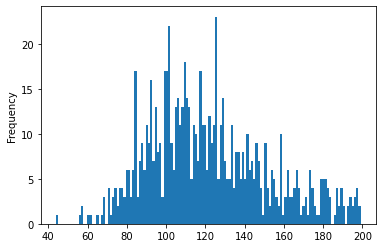

In [16]:
%matplotlib inline
count = data.Glucose.unique().size
data.Glucose.plot.hist(bins=count)

<AxesSubplot:ylabel='Frequency'>

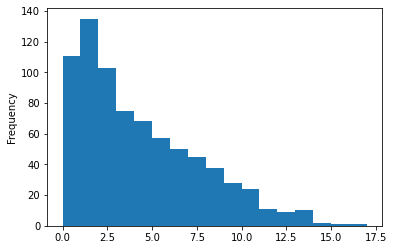

In [17]:
count = data.Pregnancies.unique().size
data['Pregnancies'].plot.hist(bins=count)

__Задание 11.__

Постройте круговую диаграмму для признака __Class__.

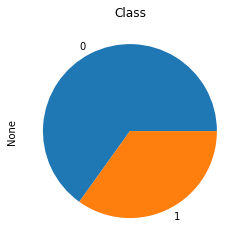

In [18]:
x = data.groupby(by = 'Class').size().plot(kind = 'pie',title = 'Class')

__Задание 12.__

Постройте распределения для признаков __Age__ и __BloodPressure__ и сравните оба распределения с нормальным. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Распределение по возрасту не похоже на нормальное


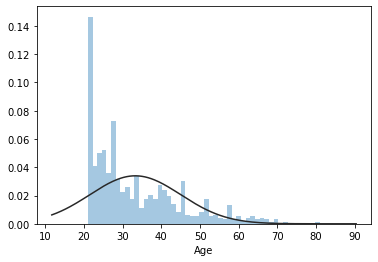

In [19]:
from scipy.stats import norm
sns.distplot(data.Age.dropna(), fit=norm,kde=False,bins=50)
print('Распределение по возрасту не похоже на нормальное')

Распределение по давлению похоже на нормальное


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


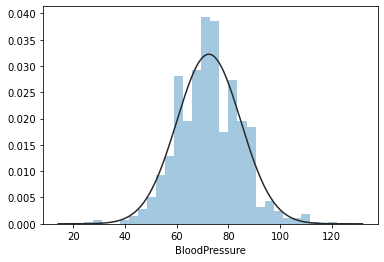

In [20]:
from scipy.stats import norm
sns.distplot(data.BloodPressure.dropna(), fit=norm,kde=False)
print('Распределение по давлению похоже на нормальное')

__Задание 13.__

Постройте следующий график: доля больных диабетом в зависимости от числа беременностей.

In [21]:
#создадим два датасета. В первом - общее число женщин в зависимости от числа беременностей 
# (будем суммировать по Age, т.к. этот столбец заполнен для всех строк)
data_full = data.groupby(['Pregnancies']).Age.count().reset_index()
#переименуем столбцы для будущего Merge
data_full.rename(columns = {'Age':'count_full'},inplace=True)
data_full.head()

,Pregnancies,count_full
0,0,111
1,1,135
2,2,103
3,3,75
4,4,68


In [22]:
#а во втором - число женщин, больных диабетом, в зависимости от числа беременностей
data_diabet = data[data.Class == 1].groupby(['Pregnancies']).Age.count().reset_index()
data_diabet.rename(columns = {'Age':'count_diabet'},inplace=True)
data_diabet.head()

,Pregnancies,count_diabet
0,0,38
1,1,29
2,2,19
3,3,27
4,4,23


In [23]:
#объединим датасеты
data_merged = data_full.merge(data_diabet,how='left')
data_merged.head()

,Pregnancies,count_full,count_diabet
0,0,111,38
1,1,135,29
2,2,103,19
3,3,75,27
4,4,68,23


In [24]:
#проверим, что нет NaN
data_merged.isna().any()

Pregnancies     False
count_full      False
count_diabet    False
dtype: bool

In [25]:
#создадим в объединённом датасете столбец с долей больных диабетом в зависимости от числа бер-й
data_merged['ratio']=round(data_merged['count_diabet']/data_merged['count_full'],2)
data_merged.head()

,Pregnancies,count_full,count_diabet,ratio
0,0,111,38,0.34
1,1,135,29,0.21
2,2,103,19,0.18
3,3,75,27,0.36
4,4,68,23,0.34


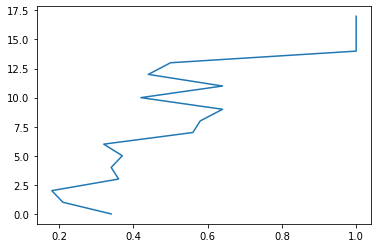

In [26]:
#график

import matplotlib.pyplot as plt
x = data_merged.ratio
y = data_merged.Pregnancies

plt.plot(x,y)

__Задание 14.__

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [27]:
data['wasPregnant']=data['Pregnancies'].apply(lambda x: 1 if x>0 else 0)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0


__Задание 15.__

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [28]:
info_pregnant = data[data.wasPregnant == 1].groupby(['Class']).count().reset_index()
#бывшие беременными, больные диабетом:
p_d = info_pregnant[info_pregnant.Class == 1].wasPregnant.values[0]
#бывшие беременными, не больные диабетом:
p_nd = info_pregnant[info_pregnant.Class == 0].wasPregnant.values[0]

info_npregnant = data[data.wasPregnant == 0].groupby(['Class']).count().reset_index()
#небывшие беременными, больные диабетом:
np_d = info_npregnant[info_pregnant.Class == 1].wasPregnant.values[0]
#небывшие беременными, не больные диабетом:
np_nd = info_npregnant[info_pregnant.Class == 0].wasPregnant.values[0]

p_ratio = round(p_d/p_nd,2)*100
np_ratio = round(np_d/np_nd,2)*100

print(f'Среди бывших беременными, {p_ratio}% женщин больны диабетом,\n\
а среди не бывших, {np_ratio}%')

Среди бывших беременными, 54.0% женщин больны диабетом,
а среди не бывших, 52.0%


__Задание 16.__

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__ 

Underweight = <18.5

Normal weight = 18.5–24.9 

Overweight = 25–29.9 

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [29]:
def bodyType(x):
    if x <= 18.5 :
        bodyType = 'Underweight'
    elif x <= 24.9  :
        bodyType = 'Normal weight'
    elif x <= 30  :
        bodyType = 'Overweight'
    else :
        bodyType = 'Obesity'        
    return bodyType

In [30]:
data['bodyType']=data['BMI'].apply(bodyType)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class,wasPregnant,bodyType
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,1,Obesity
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,1,Overweight
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,1,Normal weight
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,1,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,Obesity


__Задание 17.__

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [31]:
wealth_df = data[(data.bodyType == 'Normal weight') & (data['BloodPressure']>=80) & (data['BloodPressure']<=89)]
wealt_all = wealth_df.shape[0]
wealt_diabet = wealth_df[wealth_df.Class == 1].shape[0]
ratio = wealt_diabet/wealt_all*100
print(f'Среди "здоровых" женщин {ratio}% больны диабетом')

Среди "здоровых" женщин 10.0% больны диабетом
